
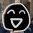

In [10]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

# このCSVには、県庁所在地の緯度・経度がlatitudeカラムとlongitudeカラムに入っている。
df_prefecture = pd.read_csv("pref_lat_lon.csv")

def visualize_locations_with_marker_cluster(df,  zoom=4):
    """日本を拡大した地図に、pandasデータフレームのlatitudeおよびlongitudeカラムをプロットする。
    """

    # 図の大きさを指定する。
    f = folium.Figure(width=1000, height=500)

    # 初期表示の中心の座標を指定して地図を作成する。
    center_lat=34.686567
    center_lon=135.52000
    m = folium.Map([center_lat,center_lon], zoom_start=zoom).add_to(f)

    # 縮尺によって、マーカーがまとめられるように設定する。
    marker_cluster = MarkerCluster().add_to(m)

    icon = CustomIcon(
    icon_image = 'nico.png'
    ,icon_size = (55, 65)
    ,icon_anchor = (30, 30)
    ,popup_anchor = (3, 3)
    )
        
    # データフレームの全ての行のマーカーを作成する。
    for i in range(0,len(df)):
        folium.Marker(
            location=[df["lat"][i],df["lon"][i]],
            popup='詳細',
            icon = icon
            ).add_to(marker_cluster)
        
    return m
    
visualize_locations_with_marker_cluster(df_prefecture, zoom=3)